In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('summary.csv')
df

,status,partition,bench,bram_used,dsp_used,lut_used,lutmem_used,reg_used,uram_used,runtime_avg,runtime_std
0,ok,1,baseline:gemm-baseline,44,3,1535,137,2642,0,10.41637,0.008533
1,ok,2,misaligned-partition:gemm-0,46,3,1479,127,2527,0,10.92971,0.009573
2,ok,3,misaligned-partition:gemm-1,59,6,1897,176,3076,0,13.16961,0.010898
3,ok,4,misaligned-partition:gemm-2,49,3,1496,128,2527,0,10.93870,0.009024
4,ok,5,misaligned-partition:gemm-3,61,6,1947,177,3071,0,13.16870,0.009792
5,ok,6,misaligned-partition:gemm-4,73,6,2028,177,3070,0,13.16563,0.010362
6,ok,7,misaligned-partition:gemm-5,85,6,2013,177,3117,0,13.16005,0.009757
7,ok,8,misaligned-partition:gemm-6,49,3,1567,129,2528,0,10.99583,0.013197
8,ok,9,misaligned-partition:gemm-7,55,6,2152,178,3052,0,13.23199,0.010465
9,ok,10,misaligned-partition:gemm-8,61,6,2218,178,3053,0,13.24232,0.009656


In [3]:
baseline = df.iloc[0]
print(baseline)

status                             ok
partition                           1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [4]:
info_keys = [ 
    'partition',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [5]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

   partition  lut_used  lutmem_used  bram_used  dsp_used  reg_used  \
0          1  1.000000     1.000000   1.000000       1.0  1.000000   
1          2  0.963518     0.927007   1.045455       1.0  0.956472   
2          3  1.235831     1.284672   1.340909       2.0  1.164269   
3          4  0.974593     0.934307   1.113636       1.0  0.956472   
4          5  1.268404     1.291971   1.386364       2.0  1.162377   
5          6  1.321173     1.291971   1.659091       2.0  1.161998   
6          7  1.311401     1.291971   1.931818       2.0  1.179788   
7          8  1.020847     0.941606   1.113636       1.0  0.956851   
8          9  1.401954     1.299270   1.250000       2.0  1.155185   
9         10  1.444951     1.299270   1.386364       2.0  1.155564   

   runtime_avg  
0     1.000000  
1     1.049282  
2     1.264319  
3     1.050145  
4     1.264231  
5     1.263936  
6     1.263401  
7     1.055630  
8     1.270307  
9     1.271299  


In [6]:
long = pd.melt(normalized_df, id_vars=['partition'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
partition    60 non-null int64
metrics      60 non-null object
values       60 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


Text(0.5, 0, 'Partitioning and Unrolling Factor')

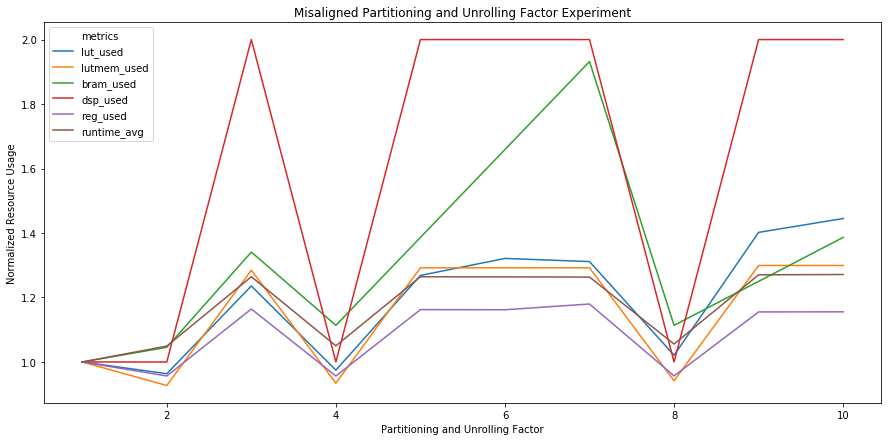

In [7]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='partition', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Partitioning and Unrolling Factor Experiment')
plot.set_ylabel('Normalized Resource Usage')
plot.set_xlabel('Partitioning and Unrolling Factor')

In [8]:
plot.figure.savefig('normalized_resources.png', dpi=300)

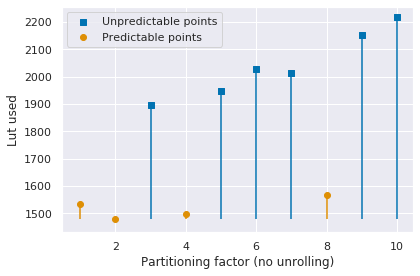

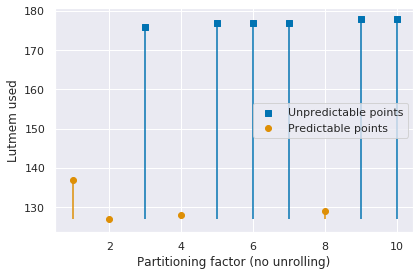

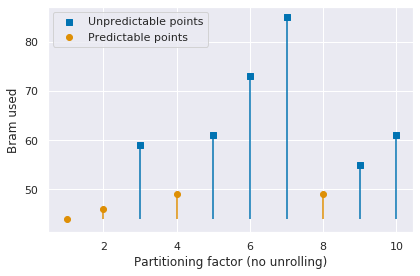

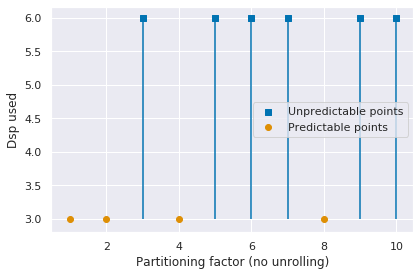

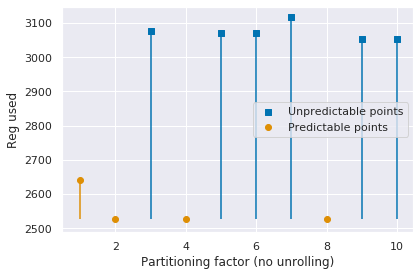

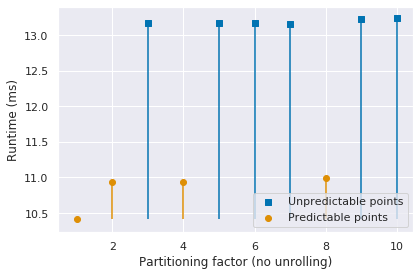

In [11]:
sns.set()

# Configuration for subplot
pal = sns.color_palette('colorblind', 8)

for idx, key in enumerate(keys):
    fig = plt.figure()
    
    normal = df[128 % df.partition != 0]
    dahlia = df[128 % df.partition == 0]
    
    plt.scatter(x='partition', y=key, data=normal, color=pal[0], label='Unpredictable points', marker='s')
    plt.vlines(x='partition', ymax=key, ymin=df[key].min(), data=normal, colors=pal[0])
    
    plt.scatter(x='partition', y=key, data=dahlia, color=pal[1], label='Predictable points')
    plt.vlines(x='partition', ymax=key, ymin=df[key].min(), data=dahlia, colors=pal[1])
   
    
    if key == 'runtime_avg':
        label = 'Runtime (ms)'
    else:
        label = key.replace('_', ' ').capitalize()
    plt.ylabel(label)
    plt.xlabel('Partitioning factor (no unrolling)')
    
    plt.legend()
    
    fig.tight_layout()
    fig.savefig('absolute-{}.png'.format(key), dpi=100)